In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from random import randrange
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
def plot_roc_auc(X_train, X_test, y_train, y_test, model):
    
    probs_train = model.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, probs_train)
    probs_test = model.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, probs_test)
    
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, probs_train)
    fpr_te, tpr_te, thresholds_te = roc_curve(y_test, probs_test)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
    fig.suptitle('Receiver Operating Characteristic (zoomed in at top left)')

    ax1.plot([0, 1], [0, 1], linestyle='--')
    ax1.plot(fpr_tr, tpr_tr, marker='.', label = 'Train ROC (area = %0.3f)' % auc_train, color = 'blue')
    ax1.plot(fpr_te, tpr_te, marker='.', label = 'Test ROC (area = %0.3f)'% auc_test, color = 'orange')
    ax1.set_xlabel('1-Specificity(False Positive Rate)')
    ax1.set_ylabel('Sensitivity(True Positive Rate)')
    ax1.legend(loc="lower right")
    
    
    ax2.set_xlim(0, 0.2)
    ax2.set_ylim(0.8, 1)
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.plot(fpr_tr, tpr_tr, marker='.', label = 'Train ROC (area = %0.3f)' % auc_train, color = 'blue')
    ax2.plot(fpr_te, tpr_te, marker='.', label = 'Test ROC (area = %0.3f)'% auc_test, color = 'orange')
    ax2.set_xlabel('False positive rate')
    ax2.set_ylabel('True positive rate')
    ax2.legend(loc='best');

In [3]:
files = [
 'is_delayed_arrival',
 'is_delayed_departure',
 'is_delayed_60_departure',
 'delayed_group_departure']

In [34]:
def perform_all_one_model(model, scale = False, pca = False):
    print("Model", type(model).__name__)
    
    for name in files:
        print()
        print()
        print('working with', name)
        df = pd.read_csv(name+'_smote.csv')
        x = df.drop([name], axis = 1)
        y = df[name].copy()
        if(pca):
            pca = PCA(n_components = x.shape[1])
            pca_data = pca.fit_transform(x)
            x = pd.DataFrame(pca_data)
    
        if(scale):
            scaler = MinMaxScaler()
            x = scaler.fit_transform(x)
    
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=4)
        
        if(type(model).__name__ == 'GaussianNB'):
            model.fit(X_train, y_train.values.ravel())
        else:
            model.fit(X_train, y_train)

        print('Accuracy on train data',name, model.score(X_train, y_train))
        print('Accuracy on test data',name, model.score(X_test, y_test))
        
        if name in ['is_delayed_60_departure', 'delayed_group_departure']:
            train_predict = model.predict(X_train)
            test_predict = model.predict(X_test)  
            print()
            print("test data classification report, confusion matrix")
            print(classification_report(y_test, test_predict)) 
            
        if name == 'is_delayed_60_departure':
            df_cm = pd.DataFrame(confusion_matrix(y_test, test_predict), index = [i for i in ["0","1"]],
                              columns = [i for i in ["Predict 0","Predict 1"]])
            plt.figure(figsize = (4,3))
            sns.heatmap(df_cm, annot=True, fmt='.0f');

            plot_roc_auc(X_train, X_test, y_train, y_test, model)
            
        if name == 'delayed_group_departure':     
            df_cm = pd.DataFrame(confusion_matrix(y_test, test_predict), index = [i for i in ["0", "1","2"]],
                              columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
            plt.figure(figsize = (5,3))
            sns.heatmap(df_cm, annot=True, fmt='.0f');

In [31]:
def perform_all_one_model5(model, scale = False, pca = False):
    print("Model", type(model).__name__)
    
    for name in ['delayed_group_a', 'delayed_group_d']:
        print()
        print()
        print('working with', name)
        df = pd.read_csv(name+'_smote.csv')
        x = df.drop([name], axis = 1)
        y = df[name].copy()
        if(pca):
            pca = PCA(n_components = x.shape[1])
            pca_data = pca.fit_transform(x)
            x = pd.DataFrame(pca_data)
    
        if(scale):
            scaler = MinMaxScaler()
            x = scaler.fit_transform(x)
    
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=4)
        
        if(type(model).__name__ == 'GaussianNB'):
            model.fit(X_train, y_train.values.ravel())
        else:
            model.fit(X_train, y_train)

        print('Accuracy on train data',name, model.score(X_train, y_train))
        print('Accuracy on test data',name, model.score(X_test, y_test))
        
        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)  
        print()
        print("test data classification report, confusion matrix")
        print(classification_report(y_test, test_predict)) 
             
        df_cm = pd.DataFrame(confusion_matrix(y_test, test_predict), index = [i for i in ["0","1","2","3","4","5"]],
                              columns = [i for i in ["Predict 0","Predict 1","Predict 2","Predict 3","Predict 4","Predict 5"]])
        plt.figure(figsize = (7,4))
        sns.heatmap(df_cm, annot=True, fmt='.0f');

# NB

Model GaussianNB


working with is_delayed_arrival
Accuracy on train data is_delayed_arrival 0.698421558594598
Accuracy on test data is_delayed_arrival 0.6958786863894316


working with is_delayed_departure
Accuracy on train data is_delayed_departure 0.8233915475920466
Accuracy on test data is_delayed_departure 0.8211385801769109


working with is_delayed_60_departure
Accuracy on train data is_delayed_60_departure 0.8375671767422788
Accuracy on test data is_delayed_60_departure 0.8316534651328427

test data classification report, confusion matrix
              precision    recall  f1-score   support

       False       0.82      0.85      0.83     23144
        True       0.84      0.82      0.83     23189

    accuracy                           0.83     46333
   macro avg       0.83      0.83      0.83     46333
weighted avg       0.83      0.83      0.83     46333



working with delayed_group_departure
Accuracy on train data delayed_group_departure 0.6313992520339219
Accuracy on tes

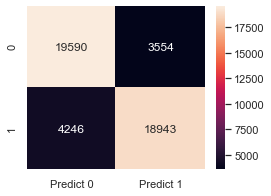

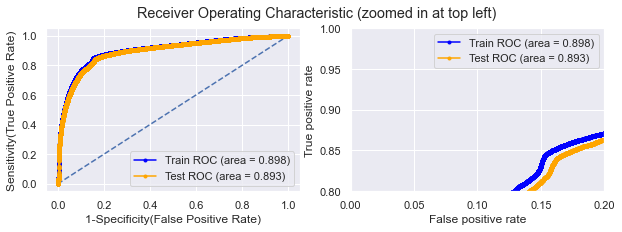

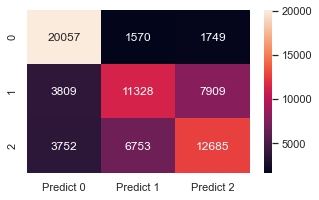

In [35]:
model_gn = GaussianNB()
perform_all_one_model(model_gn, pca=True)

# Logit

Model LogisticRegression


working with is_delayed_arrival
Accuracy on train data is_delayed_arrival 0.7057193950858478
Accuracy on test data is_delayed_arrival 0.7016156541693801


working with is_delayed_departure
Accuracy on train data is_delayed_departure 0.8352914493082332
Accuracy on test data is_delayed_departure 0.8326377863461102


working with is_delayed_60_departure
Accuracy on train data is_delayed_60_departure 0.852617644731257
Accuracy on test data is_delayed_60_departure 0.8462219152655774

test data classification report, confusion matrix
              precision    recall  f1-score   support

       False       0.84      0.85      0.85     23144
        True       0.85      0.84      0.85     23189

    accuracy                           0.85     46333
   macro avg       0.85      0.85      0.85     46333
weighted avg       0.85      0.85      0.85     46333



working with delayed_group_departure
Accuracy on train data delayed_group_departure 0.6362883260787328
Accurac

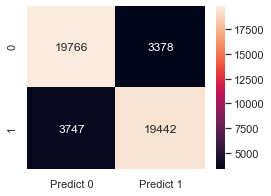

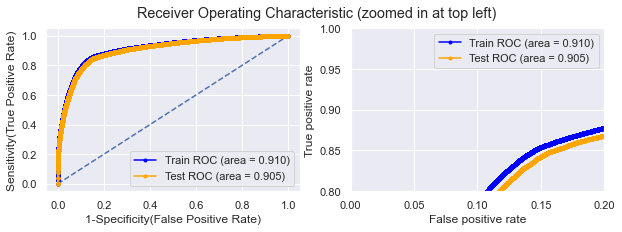

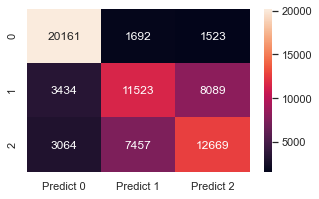

In [36]:
model_lr = LogisticRegression(solver = 'liblinear')
perform_all_one_model(model_lr)

# Random forest

Model RandomForestClassifier


working with is_delayed_arrival
Accuracy on train data is_delayed_arrival 0.7657353138793273
Accuracy on test data is_delayed_arrival 0.7532173535522684


working with is_delayed_departure
Accuracy on train data is_delayed_departure 0.8846828456944129
Accuracy on test data is_delayed_departure 0.8814016783851213


working with is_delayed_60_departure
Accuracy on train data is_delayed_60_departure 0.886171842962899
Accuracy on test data is_delayed_60_departure 0.8800638853516932

test data classification report, confusion matrix
              precision    recall  f1-score   support

       False       0.85      0.92      0.88     23144
        True       0.91      0.84      0.88     23189

    accuracy                           0.88     46333
   macro avg       0.88      0.88      0.88     46333
weighted avg       0.88      0.88      0.88     46333



working with delayed_group_departure
Accuracy on train data delayed_group_departure 0.7980539474125258
Acc

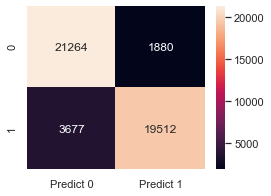

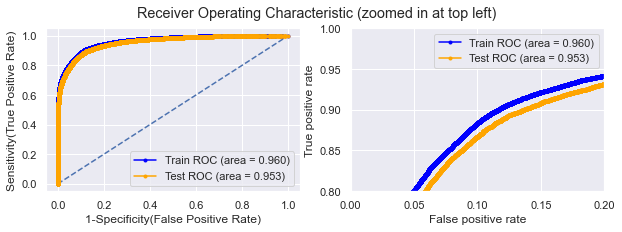

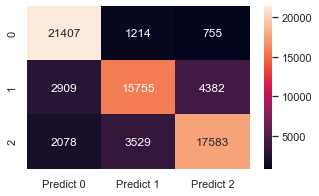

In [37]:
model_rf = RandomForestClassifier(n_estimators=40, max_depth=20, max_features=10, min_samples_leaf=100, 
                                     min_samples_split=300, random_state=1)
perform_all_one_model(model_rf)

# KNN

Model KNeighborsClassifier


working with is_delayed_arrival
Accuracy on train data is_delayed_arrival 0.8169648856224352
Accuracy on test data is_delayed_arrival 0.7226098551803268


working with is_delayed_departure
Accuracy on train data is_delayed_departure 0.9101610342481288
Accuracy on test data is_delayed_departure 0.8680426400544341


working with is_delayed_60_departure
Accuracy on train data is_delayed_60_departure 0.9545752127713149
Accuracy on test data is_delayed_60_departure 0.9240066475298383

test data classification report, confusion matrix
              precision    recall  f1-score   support

       False       0.94      0.90      0.92     23144
        True       0.91      0.94      0.93     23189

    accuracy                           0.92     46333
   macro avg       0.92      0.92      0.92     46333
weighted avg       0.92      0.92      0.92     46333



working with delayed_group_departure
Accuracy on train data delayed_group_departure 0.9652305909506639
Accu

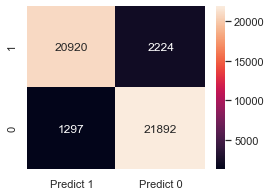

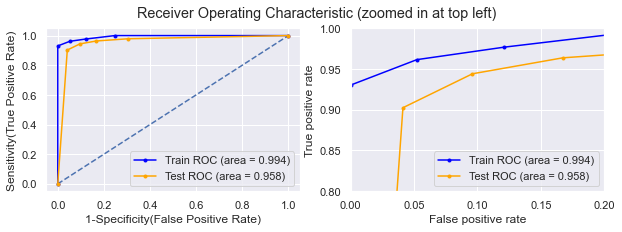

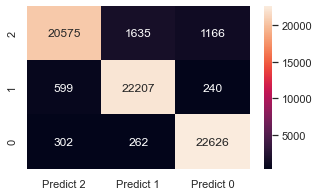

In [12]:
model_knn = KNeighborsClassifier(n_neighbors= 4)
perform_all_one_model(model_knn, scale = True)

# Boostings

Model GradientBoostingClassifier


working with is_delayed_arrival
Accuracy on train data is_delayed_arrival 0.8060801521588572
Accuracy on test data is_delayed_arrival 0.7905851707135547


working with is_delayed_departure
Accuracy on train data is_delayed_departure 0.9441143116352915
Accuracy on test data is_delayed_departure 0.9398503061918803


working with is_delayed_60_departure
Accuracy on train data is_delayed_60_departure 0.967604083482615
Accuracy on test data is_delayed_60_departure 0.9644745645652127

test data classification report, confusion matrix
              precision    recall  f1-score   support

       False       0.94      0.99      0.97     23144
        True       0.99      0.94      0.96     23189

    accuracy                           0.96     46333
   macro avg       0.97      0.96      0.96     46333
weighted avg       0.97      0.96      0.96     46333



working with delayed_group_departure
Accuracy on train data delayed_group_departure 0.8758577427896932

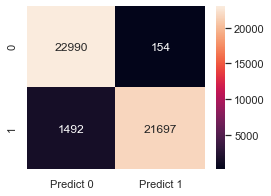

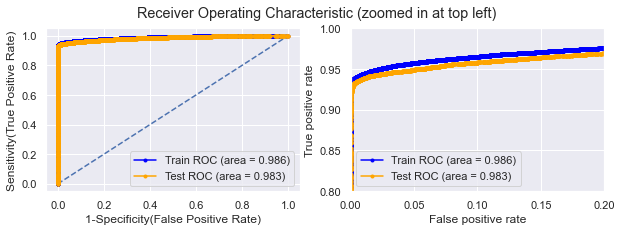

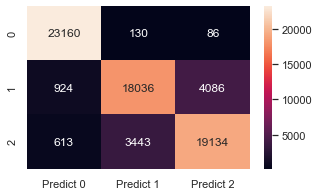

In [40]:
model_gbc = GradientBoostingClassifier(n_estimators=800, random_state=1)
perform_all_one_model(model_gbc, scale = True)

Model AdaBoostClassifier


working with is_delayed_arrival
Accuracy on train data is_delayed_arrival 0.7620450481181712
Accuracy on test data is_delayed_arrival 0.7533413960988619


working with is_delayed_departure
Accuracy on train data is_delayed_departure 0.9226581991381265
Accuracy on test data is_delayed_departure 0.9197550464958041


working with is_delayed_60_departure
Accuracy on train data is_delayed_60_departure 0.9441290944539169
Accuracy on test data is_delayed_60_departure 0.9420283599162584

test data classification report, confusion matrix
              precision    recall  f1-score   support

       False       0.93      0.96      0.94     23144
        True       0.95      0.93      0.94     23189

    accuracy                           0.94     46333
   macro avg       0.94      0.94      0.94     46333
weighted avg       0.94      0.94      0.94     46333



working with delayed_group_departure
Accuracy on train data delayed_group_departure 0.7404912058917892
Accura

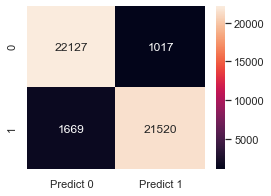

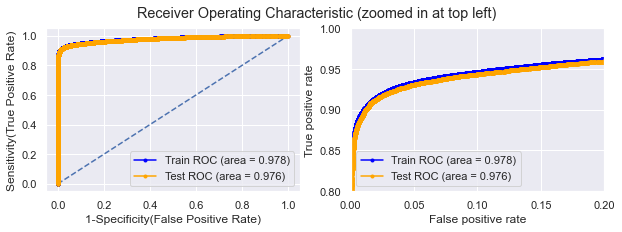

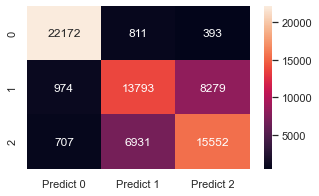

In [39]:
model_ada = AdaBoostClassifier(n_estimators=800, random_state=1)
perform_all_one_model(model_ada, scale = True)

# Bagging

Model BaggingClassifier


working with delayed_group_a
Accuracy on train data delayed_group_a 0.999860151300461
Accuracy on test data delayed_group_a 0.949986938659194

test data classification report, confusion matrix
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     21148
           1       0.93      0.88      0.90     20961
           2       0.94      0.91      0.93     21006
           3       0.98      0.98      0.98     21180
           4       0.99      0.99      0.99     20927
           5       0.97      0.96      0.97     21105

    accuracy                           0.95    126327
   macro avg       0.95      0.95      0.95    126327
weighted avg       0.95      0.95      0.95    126327



working with delayed_group_d
Accuracy on train data delayed_group_d 0.9997360105920673
Accuracy on test data delayed_group_d 0.8102200453249506

test data classification report, confusion matrix
              precision    recall  f1-sco

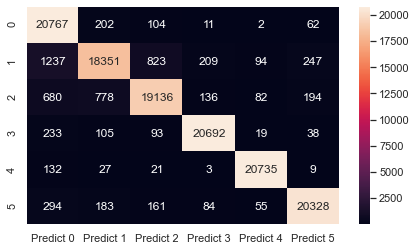

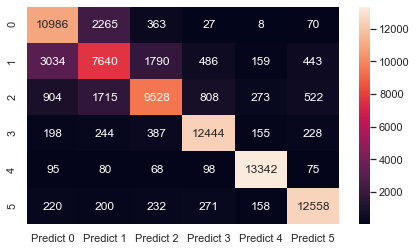

In [32]:
model_bg = BaggingClassifier(n_estimators=25,random_state=1, max_features=10)
perform_all_one_model5(model_bg)

Model BaggingClassifier


working with is_delayed_arrival
Accuracy on train data is_delayed_arrival 0.9989353014750726
Accuracy on test data is_delayed_arrival 0.7924147982758086


working with is_delayed_departure
Accuracy on train data is_delayed_departure 0.9993346941861344
Accuracy on test data is_delayed_departure 0.9491721478793377


working with is_delayed_60_departure
Accuracy on train data is_delayed_60_departure 0.9992949589565393
Accuracy on test data is_delayed_60_departure 0.9699350355038525

test data classification report, confusion matrix
              precision    recall  f1-score   support

       False       0.95      1.00      0.97     23144
        True       1.00      0.94      0.97     23189

    accuracy                           0.97     46333
   macro avg       0.97      0.97      0.97     46333
weighted avg       0.97      0.97      0.97     46333



working with delayed_group_departure
Accuracy on train data delayed_group_departure 0.9996839579951444
Accurac

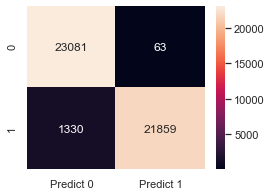

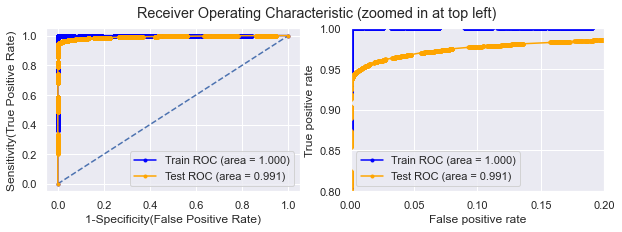

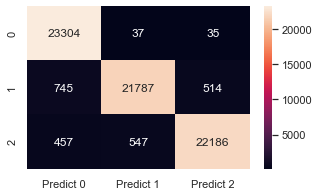

In [38]:
model_bg = BaggingClassifier(n_estimators=25,random_state=1, max_features=10)
perform_all_one_model(model_bg)

# Hyperparam tuning

In [239]:
a, b, c = [], [], []
for i in [4, 5, 6, 7, 10, 15, 20]:
    a.append(i)
    model_knn = KNeighborsClassifier(n_neighbors= i)
    model_knn.fit(X_train, y_train)
    print('Accuracy on test data', model_knn.score(X_train, y_train))
    print('Accuracy on test data', model_knn.score(X_test, y_test))
    b.append(model_knn.score(X_train, y_train))
    c.append(model_knn.score(X_test, y_test))
    
train_predict = model_knn.predict(X_train)
test_predict = model_knn.predict(X_test)

print("TRAIN")
print(classification_report(y_train, train_predict))
print(confusion_matrix(y_train, train_predict))

Accuracy on test data 0.9303714398214988
Accuracy on test data 0.8842519685039371
Accuracy on test data 0.9111431946449665
Accuracy on test data 0.8755905511811024
Accuracy on test data 0.9121932012075076
Accuracy on test data 0.8792650918635171
Accuracy on test data 0.9009056306601916
Accuracy on test data 0.8782152230971129
Accuracy on test data 0.8930962068512929
Accuracy on test data 0.8774278215223097
Accuracy on test data 0.8798398739992125
Accuracy on test data 0.873490813648294
Accuracy on test data 0.8747867174169839
Accuracy on test data 0.8671916010498688
TRAIN
              precision    recall  f1-score   support

       False       0.89      0.84      0.87      7450
        True       0.86      0.90      0.88      7788

    accuracy                           0.87     15238
   macro avg       0.88      0.87      0.87     15238
weighted avg       0.88      0.87      0.87     15238

[[6293 1157]
 [ 751 7037]]


500
600
700
800
900
1000


Text(0, 0.5, 'Accuracy')

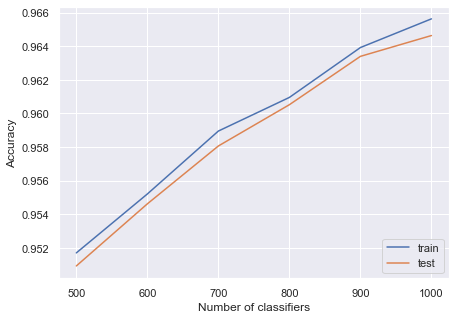

In [276]:
name = 'is_delayed_90_departure'
df = pd.read_csv(name+'_smote.csv')
x = df.drop([name], axis = 1)
y = df[name].copy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=4)

acc_rl, acc_tl, cll = [], [], []

for i in [500, 600, 700, 800, 900, 1000]:
    '''мона шматочок перемалювати якщо чо'''
    cll.append(i)
    print(i)
    model_ada = AdaBoostClassifier(n_estimators=i, random_state=1)
    model_ada.fit(X_train, y_train)

    acc_rl.append(model_ada.score(X_train, y_train))
    acc_tl.append(model_ada.score(X_test, y_test))
    
plt.figure(figsize=(7, 5))
plt.plot(cll, acc_rl, label = 'train')
plt.plot(cll, acc_tl, label = 'test')
plt.xlabel('Number of classifiers')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')

1100
1250
1450
1700
1850
2050


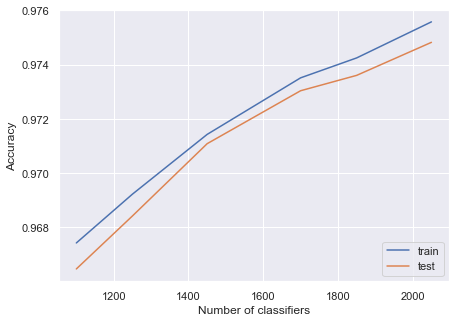

In [298]:
name = 'is_delayed_90_departure'
df = pd.read_csv(name+'_smote.csv')
x = df.drop([name], axis = 1)
y = df[name].copy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=4)

acc_r, acc_t, cl = [], [], []

for i in [1100, 1250, 1450, 1700, 1850, 2050]:
    '''мона шматочок перемалювати якщо чо'''
    cl.append(i)
    print(i)
    model_ada = AdaBoostClassifier(n_estimators=i, random_state=1)
    model_ada.fit(X_train, y_train)

    acc_r.append(model_ada.score(X_train, y_train))
    acc_t.append(model_ada.score(X_test, y_test))
    
plt.figure(figsize=(7, 5))
plt.plot(cl, acc_r, label = 'train')
plt.plot(cl, acc_t, label = 'test')
plt.xlabel('Number of classifiers')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy');

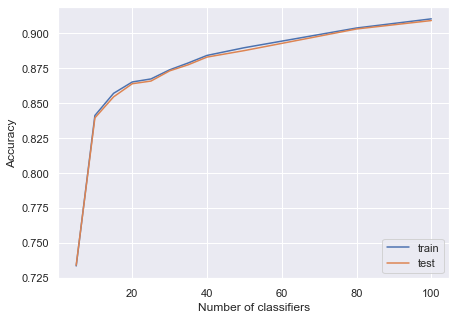

In [272]:
plt.figure(figsize=(7, 5))
plt.plot(cl, acc_r, label = 'train')
plt.plot(cl, acc_t, label = 'test')
plt.xlabel('Number of classifiers')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy');

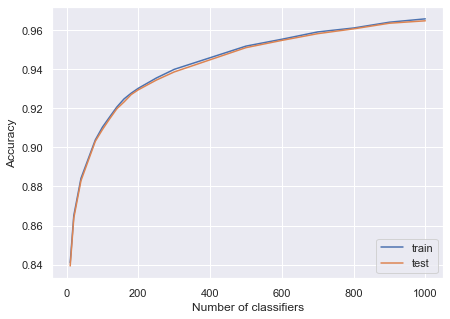

In [296]:
plt.figure(figsize = (7, 5))
plt.plot(ect_ada, acc_rada, label = 'train')
plt.plot(ect_ada, acc_tada, label = 'test')
plt.xlabel('Number of classifiers')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

In [386]:
df = pd.read_csv('delayed_group_d_smote.csv')
x = df.drop(['delayed_group_d'], axis = 1)
y = df['delayed_group_d'].copy() 
y = y.replace(0,2)
y = y.replace(1,2)
tr = y[y == 2].index
to_remove = []
for i in range(0, len(tr), 2):
    to_remove.append(tr[i])

y = y.drop(index=to_remove)
x = x.drop(index=to_remove)
print(len(x))
print(len(y))
y.value_counts()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=4)

model_bg = BaggingClassifier(n_estimators=25,random_state=1, max_features=10)
model_bg.fit(X_train, y_train)

print('Accuracy on train data', model_bg.score(X_train, y_train))
print('Accuracy on test data', model_bg.score(X_test, y_test))

train_predict = model_bg.predict(X_train)
test_predict = model_bg.predict(X_test)

print(classification_report(y_test, test_predict))
print(confusion_matrix(y_test, test_predict))

246222
246222
Accuracy on train data 0.9999079419059275
Accuracy on test data 0.9305023068425499
              precision    recall  f1-score   support

           2       0.90      0.93      0.92     20611
           3       0.93      0.90      0.91     13786
           4       0.97      0.97      0.97     13637
           5       0.94      0.92      0.93     13522

    accuracy                           0.93     61556
   macro avg       0.93      0.93      0.93     61556
weighted avg       0.93      0.93      0.93     61556

[[19234   667   204   506]
 [ 1063 12388   142   193]
 [  286    81 13213    57]
 [  710   254   115 12443]]


In [301]:
for i in [30, 50, 70, 90]:
    print(i)
    model_bg = BaggingClassifier(n_estimators=i,random_state=1)
    model_bg.fit(X_train, y_train)

    print('Accuracy on train data', model_bg.score(X_train, y_train))
    print('Accuracy on test data', model_bg.score(X_test, y_test))

30
Accuracy on train data 0.9996010107727091
Accuracy on test data 0.977005942756347
50
Accuracy on train data 0.999930001889949
Accuracy on test data 0.9771109384515235
70
Accuracy on train data 0.9999790005669847
Accuracy on test data 0.9770689401734529
90
Accuracy on train data 0.999993000188995
Accuracy on test data 0.9772579324247705
